In [1]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from skimage.io import imread,imsave
from scipy.ndimage import distance_transform_edt
from skimage.color import rgb2hed
from skimage.color import rgb2hsv
from scipy import ndimage as ndi
from skimage.segmentation import mark_boundaries
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import exposure, img_as_ubyte
from skimage.filters import threshold_multiotsu
from skimage.filters import threshold_otsu
from skimage.morphology import opening,closing,disk
from skimage import img_as_float
from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)
from skimage.filters.rank import gradient
from skimage.measure import label


In [2]:
#image = imread("/home/robin/Downloads/saturation.png")[:1000,:1000]
img = imread('rgb_good_.jpg')[:1000,:1000]

<IPython.core.display.Javascript object>


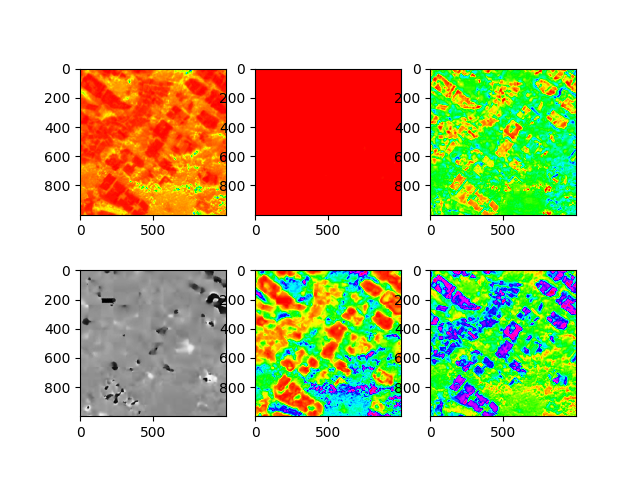

In [3]:
hed = rgb2hed(img)
hsv = rgb2hsv(img)

plt.figure()

plt.subplot(2,3,1)
plt.imshow(hed[...,0], cmap ='hsv')
plt.subplot(2,3,2)
plt.imshow(hed[...,1], cmap ='hsv')
plt.subplot(2,3,3)
plt.imshow(hed[...,2], cmap ='hsv')
plt.subplot(2,3,4)
plt.imshow(hsv[...,0], cmap ='gray')
plt.subplot(2,3,5)
plt.imshow(hsv[...,1], cmap ='hsv')
plt.subplot(2,3,6)
plt.imshow(hsv[...,2], cmap ='hsv')
plt.show()

<IPython.core.display.Javascript object>


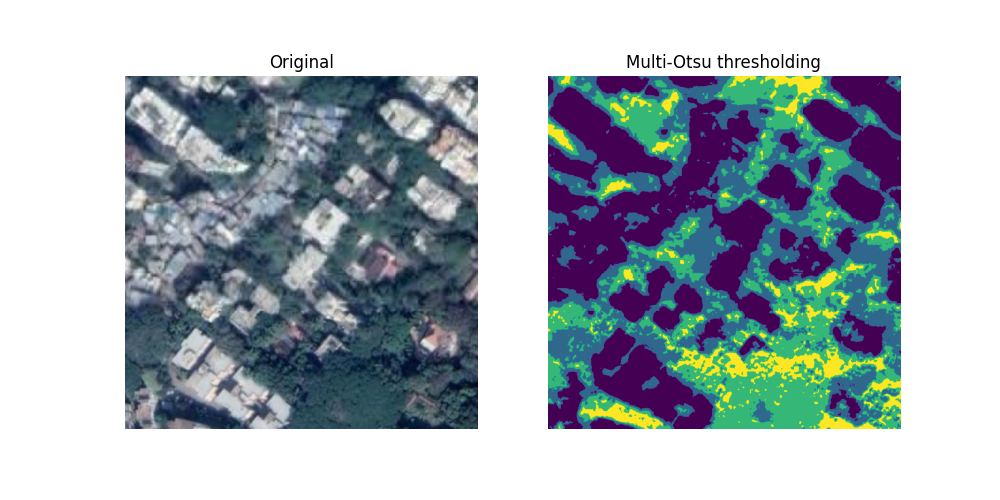

In [4]:
image = hsv[:,:,1].copy()
thresholds = threshold_multiotsu(image, classes=4)
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].axis('off')
plt.show()

<IPython.core.display.Javascript object>


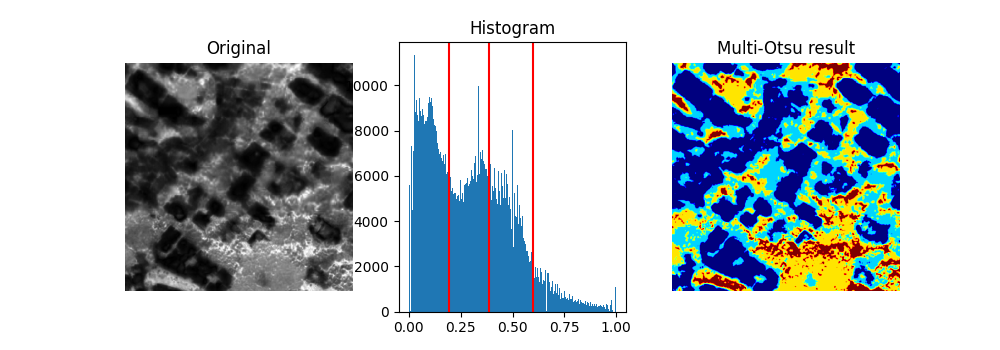

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

<IPython.core.display.Javascript object>


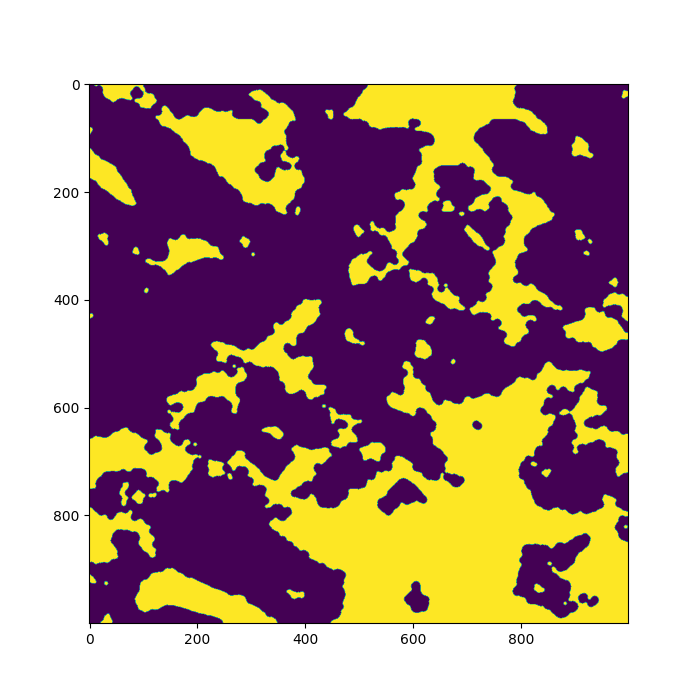

In [6]:
not_tree = image <= thresholds[1]
#label = measure.label(not_tree)
mask = ~closing(opening(not_tree, disk(7)), disk(3))
plt.figure(figsize = (7,7))
plt.imshow(mask)
plt.show()

<IPython.core.display.Javascript object>


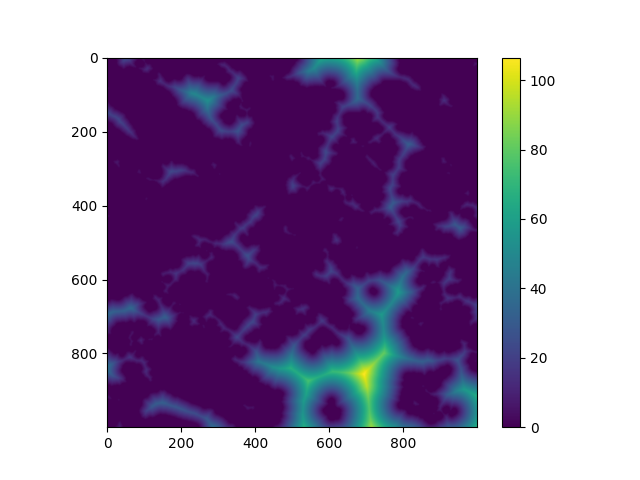

In [7]:
from scipy.ndimage import distance_transform_edt

distance = distance_transform_edt(mask)

plt.figure()
plt.imshow(distance)
plt.colorbar()
plt.show()

In [8]:
from skimage.feature import peak_local_max

markers = peak_local_max(distance, min_distance=2, indices=True)

/tmp/ipykernel_1951/1786851622.py:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  markers = peak_local_max(distance, min_distance=2, indices=True)


<IPython.core.display.Javascript object>


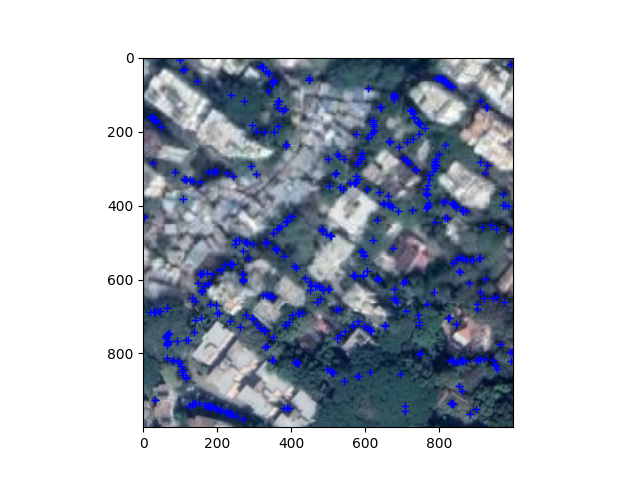

In [9]:
plt.figure()
plt.imshow(img)
for m in markers:
    plt.plot(m[1],m[0],'b+')
plt.show()

/tmp/ipykernel_1951/2013869980.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  grad = gradient(img_as_float(mask),disk(1))
/tmp/ipykernel_1951/2013869980.py:2: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  markers = label(peak_local_max(distance, min_distance=2, indices=False))


<IPython.core.display.Javascript object>


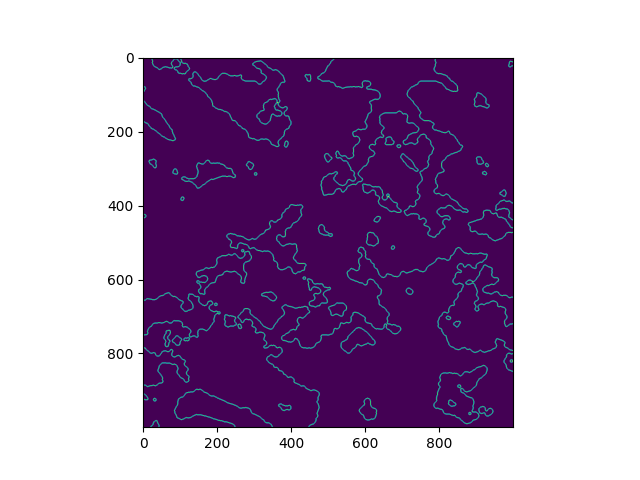

In [10]:
grad = gradient(img_as_float(mask),disk(1))
markers = label(peak_local_max(distance, min_distance=2, indices=False))

plt.figure()
plt.imshow(grad)
plt.show()

<IPython.core.display.Javascript object>


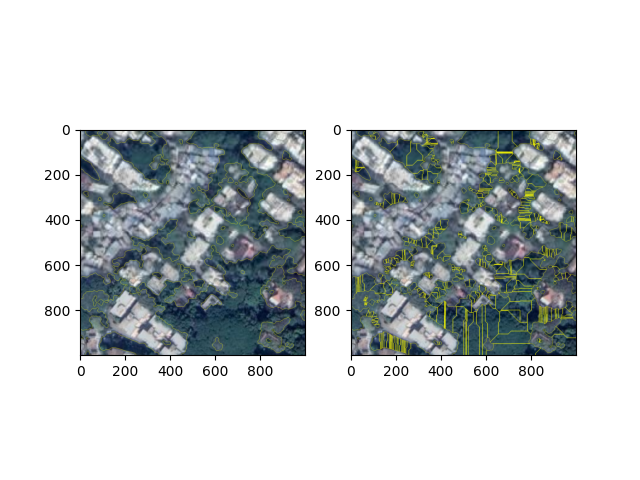

<IPython.core.display.Javascript object>


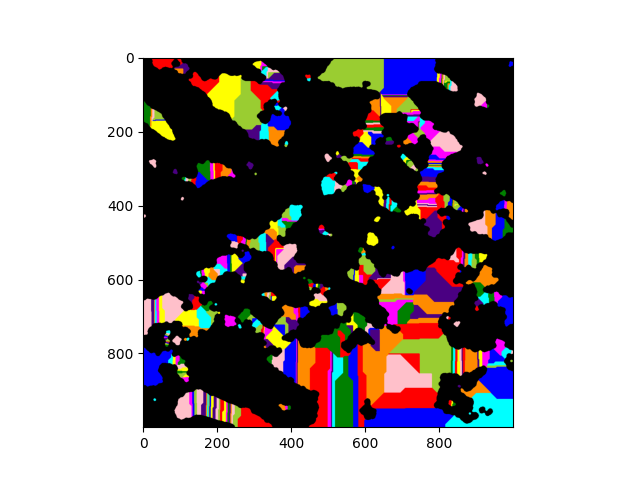

In [11]:
ws = watershed(grad,markers,mask=mask)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(mark_boundaries(img, mask))
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(img,ws))
plt.figure()
plt.imshow(color.label2rgb(ws, bg_label=0))
plt.show()

In [11]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.measure import label
from skimage import data
from skimage import color
from skimage.morphology import extrema
from skimage import exposure


color_image = imread("/home/robin/Downloads/masked.png")[...,:3]

# for illustration purposes, we work on a crop of the image.
x_0 = 70
y_0 = 354
width = 100
height = 100

img = color.rgb2gray(color_image)#[y_0:(y_0 + height), x_0:(x_0 + width)]

# the rescaling is done only for visualization purpose.
# the algorithms would work identically in an unscaled version of the
# image. However, the parameter h needs to be adapted to the scale.
img = exposure.rescale_intensity(img)
#MAXIMA DETECTION

# Maxima in the galaxy image are detected by mathematical morphology.
# There is no a priori constraint on the density.

# We find all local maxima
local_maxima = extrema.local_maxima(img)
label_maxima = label(local_maxima)
overlay = color.label2rgb(label_maxima, img, alpha=0.7, bg_label=0,
                          bg_color=None, colors=[(1, 0, 0)])

# We observed in the previous image, that there are many local maxima
# that are caused by the noise in the image.
# For this, we find all local maxima with a height of h.
# This height is the gray level value by which we need to descent
# in order to reach a higher maximum and it can be seen as a local
# contrast measurement.
# The value of h scales with the dynamic range of the image, i.e.
# if we multiply the image with a constant, we need to multiply
# the value of h with the same constant in order to achieve the same result.
h = 0.5
h_maxima = extrema.h_maxima(img, h)
label_h_maxima = label(h_maxima)
overlay_h = color.label2rgb(label_h_maxima, img, alpha=0.7, bg_label=0,
                            bg_color=None, colors=[(1, 0, 0)])


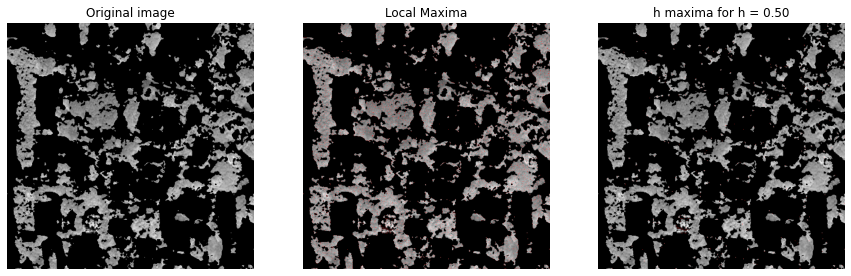

In [12]:
# a new figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(overlay)
ax[1].set_title('Local Maxima')
ax[1].axis('off')

ax[2].imshow(overlay_h)
ax[2].set_title('h maxima for h = %.2f' % h)
ax[2].axis('off')
plt.show()


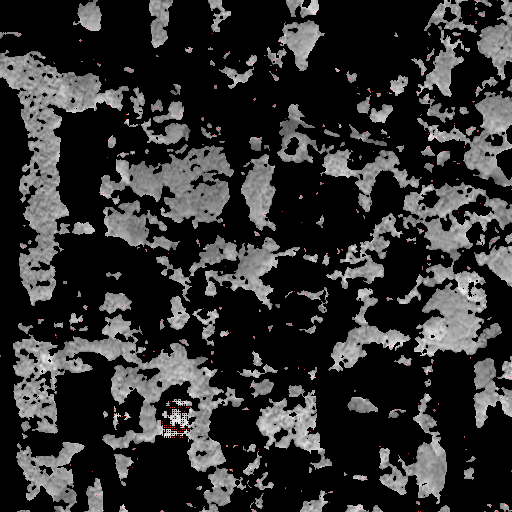

In [13]:
import plotly.express as px
fig = px.imshow(overlay_h)
fig.show()